In [ ]:
import pandas as pd
df=pd.read_csv('data_for_exam.csv')
df

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [ ]:
df.head(5)

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [ ]:
df2=df.drop('Company public response',axis=1)
df2.head(3)

,Date received,Product,Sub-product,Consumer complaint narrative,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN


In [ ]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [ ]:
df_cleaned = df.dropna(subset=['Consumer disputed?'])
df_cleaned = df.dropna(subset=['ZIP code'])

# df_cleaned = df.dropna()


In [ ]:
df_cleaned.isnull().sum()

Date received                    0
Product                          0
Sub-product                     12
Consumer complaint narrative    79
Company public response         60
Company                          0
State                            0
ZIP code                         0
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              16
dtype: int64

In [ ]:
fill_values = {'Sub-product': 'Not Available', 'Consumer complaint narrative': 'Consumer not comment','Company public response': 'Company Remarks not Abvailable','Consumer disputed?': 'Awaiting'}
df_filled = df_cleaned.fillna(fill_values)
df_filled.isnull().sum()

In [ ]:
df_filled.head(15)

In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 89 non-null     object
 1   Product                       89 non-null     object
 2   Sub-product                   89 non-null     object
 3   Consumer complaint narrative  89 non-null     object
 4   Company public response       89 non-null     object
 5   Company                       89 non-null     object
 6   State                         89 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 89 non-null     object
 9   Company response to consumer  89 non-null     object
 10  Timely response?              89 non-null     object
 11  Consumer disputed?            89 non-null     object
dtypes: object(12)
memory usage: 9.0+ KB


<h1>
51 companies are working on 11 products in 34 States.
Companies are responding In Time.
To received Complaints 5 mediums are used.

In [ ]:
unique_counts = df_filled.nunique()

print(unique_counts)

Date received                   85
Product                         11
Sub-product                     24
Consumer complaint narrative    11
Company public response          6
Company                         51
State                           34
ZIP code                        88
Submitted via                    5
Company response to consumer     6
Timely response?                 1
Consumer disputed?               3
dtype: int64


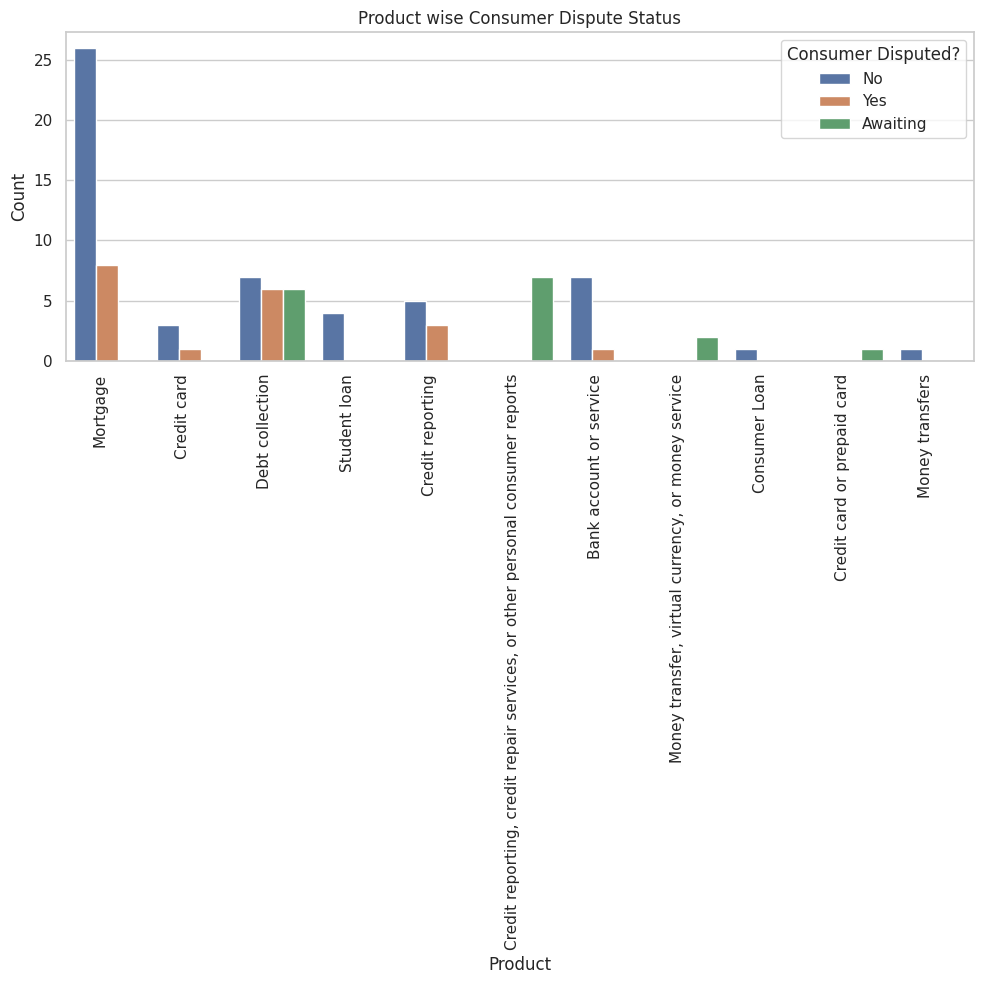

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_filled, x='Product', hue='Consumer disputed?')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Product wise Consumer Dispute Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Consumer Disputed?')

plt.tight_layout()
plt.show()

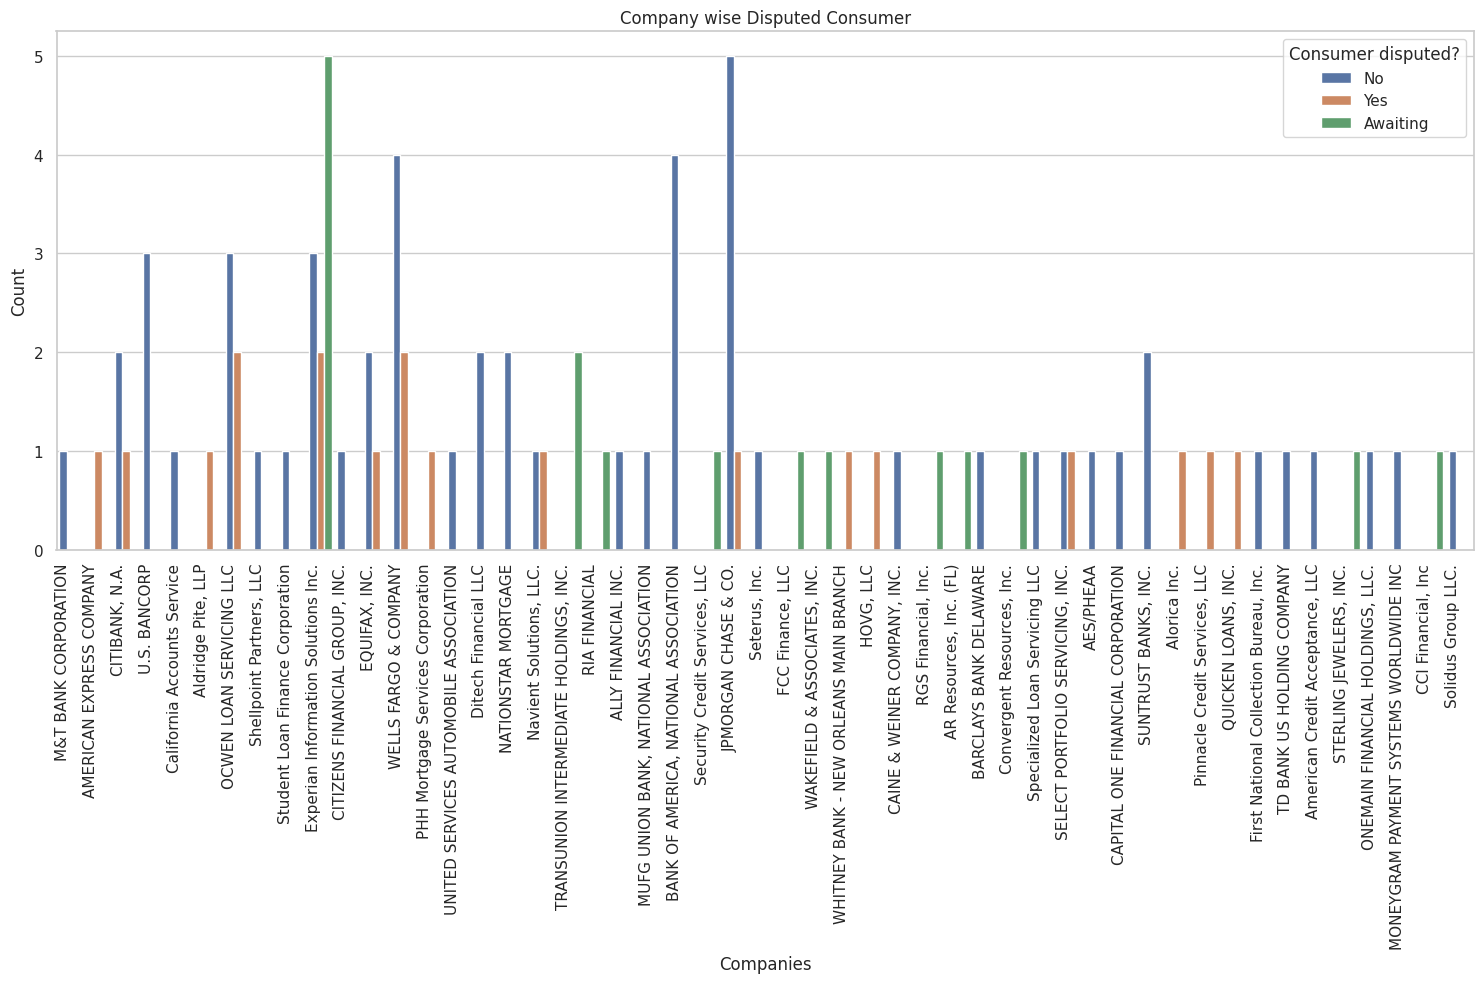

In [ ]:
# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df_filled, x='Company', hue='Consumer disputed?')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Company wise Disputed Consumer')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.legend(title='Consumer disputed?')

plt.tight_layout()
plt.show()

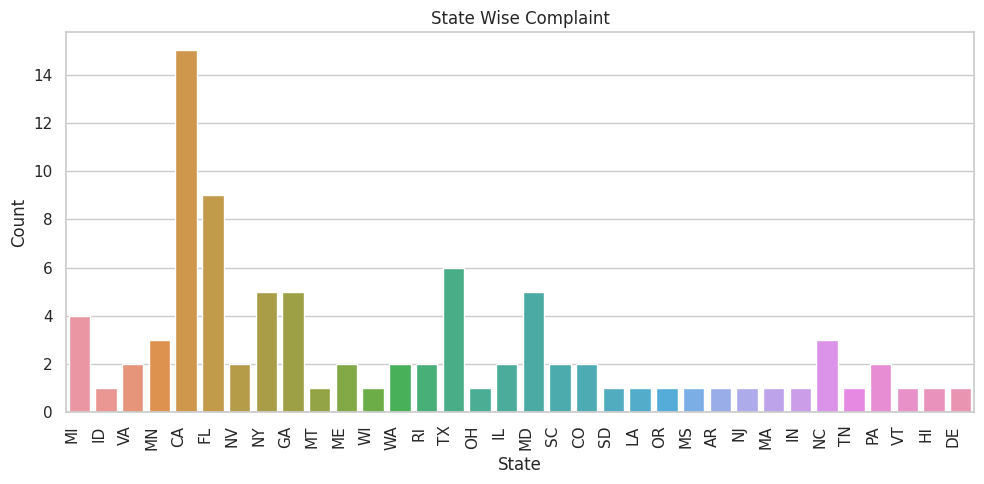

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='State')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('State Wise Complaint')
plt.xlabel('State')
plt.ylabel('Count')
# plt.legend(title='State')

plt.tight_layout()
plt.show()

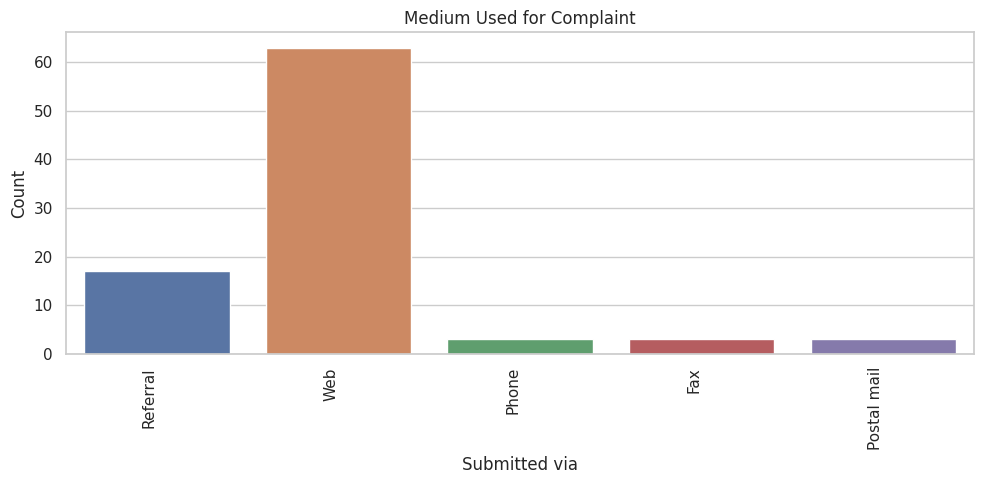

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='Submitted via')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Medium Used for Complaint')
plt.xlabel('Submitted via')
plt.ylabel('Count')
# plt.legend(title='Submitted via')

plt.tight_layout()
plt.show()

<ipython-input-139-80e3b99cad5e>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


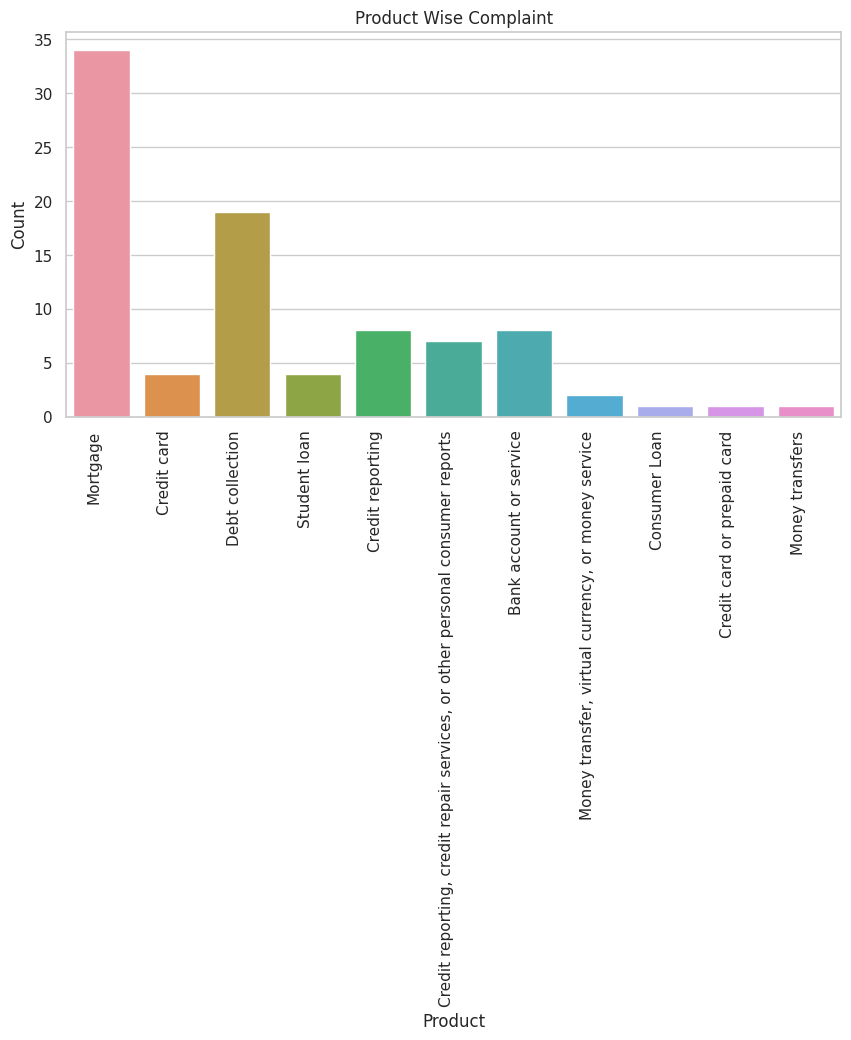

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_filled, x='Product')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Product Wise Complaint')
plt.xlabel('Product')
plt.ylabel('Count')
# plt.legend(title='Submitted via')

plt.tight_layout()
plt.show()